In [35]:
import sympy as sym
%matplotlib inline
sym.init_printing()

import matplotlib.pyplot as plt
from sympy.plotting.plot import MatplotlibBackend

def logx_plot(Hw, wrange, **kwargs):
    'create plot with logarithmic x-axis'
    p = sym.plot(Hw, wrange, **kwargs)
    backend = MatplotlibBackend(p)
    backend.process_series()
    backend.ax[0].spines['left'].set_position(('axes', 0))
    backend.ax[0].spines['bottom'].set_position(('axes', 0))
    plt.xscale('log')
    plt.grid(which='both')
    return p

def db(x):
    'compute dB value'
    return 20 * sym.log(sym.Abs(x), 10)

from sympy.physics.control.control_plots import bode_plot
from sympy.physics.control.lti import TransferFunction

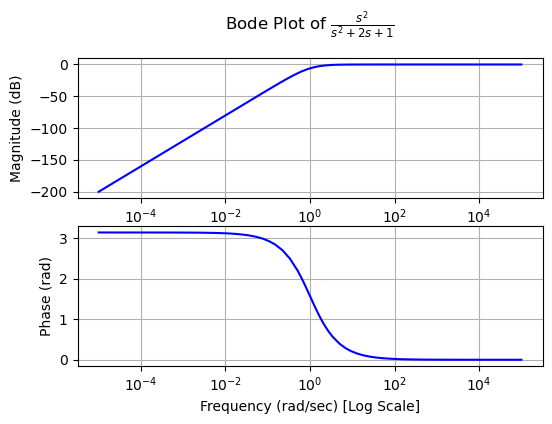

In [52]:
H1 = TransferFunction(s**2,s**2+2*s+1, s)
plt.rcParams['figure.figsize'] = 6, 4

bode_plot(H1) 

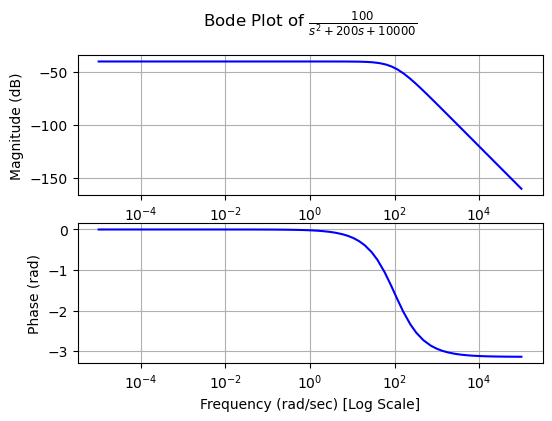

In [55]:
H2 = TransferFunction(100,s**2+200*s+10000, s)
plt.rcParams['figure.figsize'] = 6, 4

bode_plot(H2) 

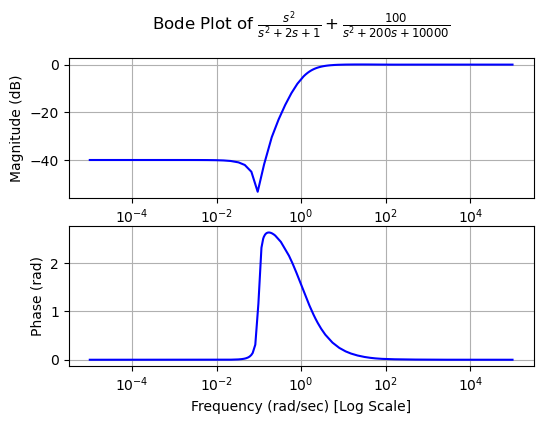

In [57]:
bode_plot(H1+H2) 

# Combinación de Modelos Frecuenciales

Es conveniente analizar sistemas elaborados como una representación de sistemas más sencillos. A continuación los principales tipos de combinación.

## Concatenación / Serie

Cuando dos sistemas LTI $H_1$ y $H_2$ están interconectados de manera que la salida de $H_1$ es la entrada de $H_2$. Esta es la conexión en **Serie** o **Concatenación de sistemas**.

Suponga que:
- La respuesta impulsional de $H_1$ es $h_1(t)$.
- La respuesta impulsional de $H_2$ es $h_2(t)$.
- La concatenación se excita con una señal $x(t)$.

La salida de $H_1$ es entonces $x(t)*h_1(t)$. La salida de la concatenación de sistemas es:

\begin{equation}
y(t) =  x(t) * h_1(t) * h_2(t)
\end{equation}

En el dominio de Laplace, la convolución anterior se transforma en:

\begin{equation}
Y(s) = \underbrace{H_1(s) \cdot H_2(s)}_{H(s)} \cdot X(s)
\end{equation}

Así, los dos sistemas concatenados tienen una equivalencia $H(s) = H_1(s) \cdot H_2(s)$.

![Dos sistemas concatenados](figuras/concatenation.png)

Si se tienen $N$ sistemas conectados en serie, el modelo equivalente está dado por la multiplicación de las respectivas funciones de transferencia.

\begin{equation}
H(s) = \prod_{n=1}^{N} H_n(s)
\end{equation}


**Ejemplo**

Al concatenar filtros de bajo orden se obtiene un filtro de orden más elevado.

Suponga las siguientes funciones de transferencia para filtros de orden 2.

\begin{equation}
G(s) = \frac{1}{LC s^2 + RC s + 1}
\end{equation}

Si se concatenan $N$ filtros con acoples de impedancia, se obtiene:

\begin{equation}
H_N(s) = \left( \frac{1}{LC s^2 + RC s + 1} \right)^N
\end{equation}

A continuación los diagramas de Bode. Para valores $R$, $L$ y $C$.


In [2]:
s = sym.symbols('s', complex=True)
w = sym.symbols('omega', real=True)
R = 1
L = 0.5
C = 0.4

N = sym.symbols('N', integer=True)

H0 = 1/(L*C*s**2 + R*C*s + 1)
HN = H0**N
HN




Ahora se definen valores para $s = \sigma + j \omega$.

In [3]:
sym.I * w

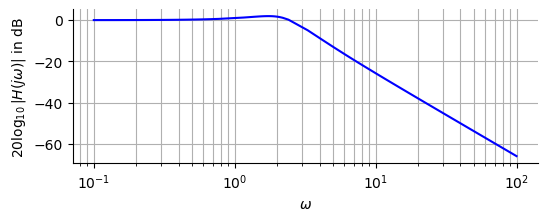

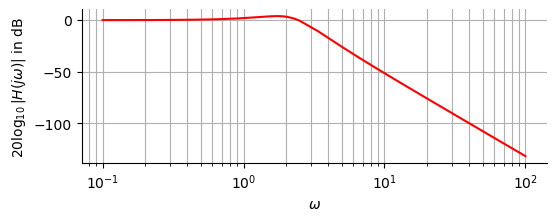

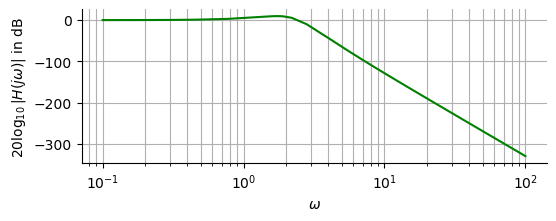

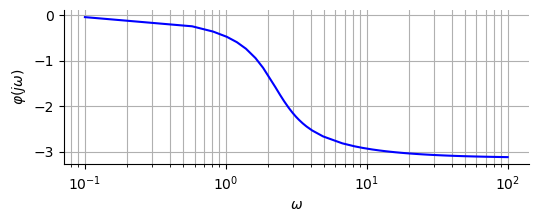

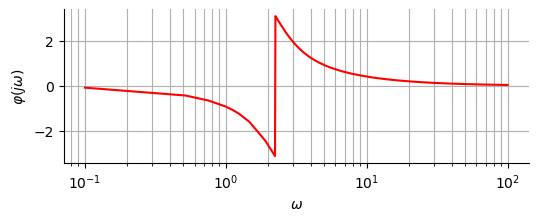

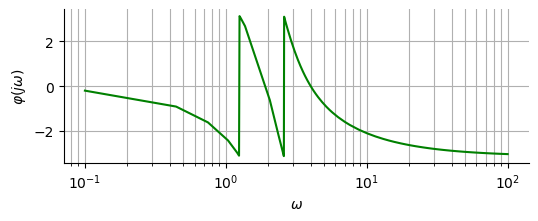

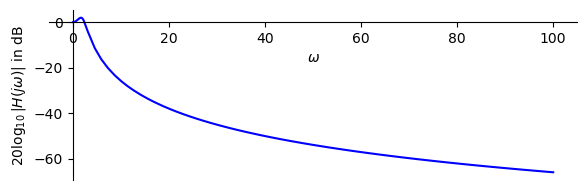

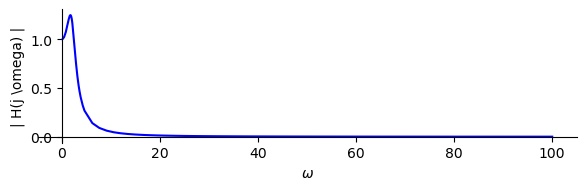

In [4]:
H0w = H0.subs(s, sym.I * w)
HNw = HN.subs(s, sym.I * w)

plt.rcParams['figure.figsize'] = 6, 2

m1 = logx_plot(db(H0w), (w, 0.1, 100),
               xlabel='$\omega$',
               ylabel='$20 \log_{10} | H(j \omega) |$ in dB',
               line_color='b', show=False)
m2 = logx_plot(db(HNw.subs(N, 2)), (w, 0.1, 100),
               xlabel='$\omega$', ylabel='$20 \log_{10} | H(j \omega) |$ in dB',
               line_color='r', show=False);
m5 = logx_plot(db(HNw.subs(N, 5)), (w, 0.1, 100),
               xlabel='$\omega$', ylabel='$20 \log_{10} | H(j \omega) |$ in dB',
               line_color='g', show=False);
f1 = logx_plot(sym.arg(H0w), (w, 0.1, 100),
               xlabel='$\omega$', ylabel=r'$\varphi(j \omega)$',
               line_color='b', show=False);
f2 = logx_plot(sym.arg(HNw.subs(N, 2)), (w, 0.1, 100),
               xlabel='$\omega$', ylabel=r'$\varphi(j \omega)$',
               line_color='r', show=False);
f5 = logx_plot(sym.arg(HNw.subs(N, 5)), (w, 0.1, 100),
               xlabel='$\omega$', ylabel=r'$\varphi(j \omega)$',
               line_color='g', show=False);

M1 = sym.plot(sym.Abs(H0w), (w, 0.1, 100),
               xlabel='$\omega$',
               ylabel='| H(j \omega) |',
               line_color='b', show=False)
m1.show()
M1.show()

In [15]:
num,den = H0.as_numer_denom()
sym.roots(den)

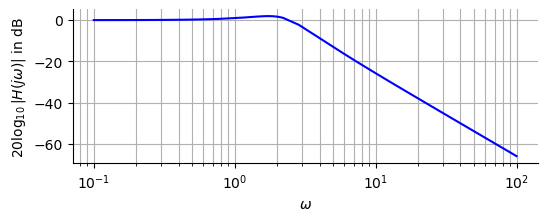

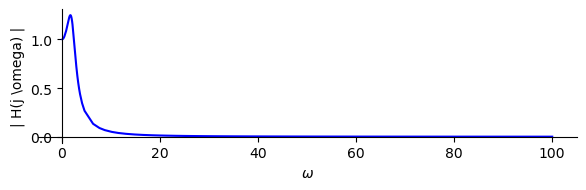

In [7]:
m1 = logx_plot(db(H0w), (w, 0.1, 100),
               xlabel='$\omega$',
               ylabel='$20 \log_{10} | H(j \omega) |$ in dB',
               line_color='b', show=False)
sym.plot(sym.Abs(H0w), (w, 0.1, 100),
               xlabel='$\omega$',
               ylabel='| H(j \omega) |',
               line_color='b')

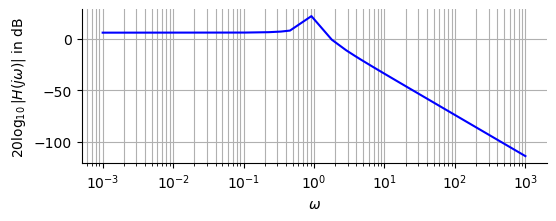

In [30]:
H = 2/(s**2+1)
logx_plot(db(H.subs(s,w*sym.I)), (w, 0.001, 1000),
               xlabel='$\omega$',
               ylabel='$20 \log_{10} | H(j \omega) |$ in dB',
               line_color='b', show=False)

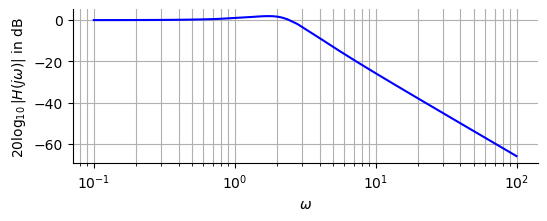

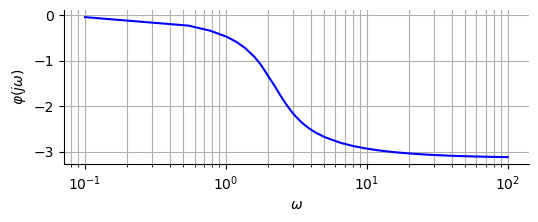

In [5]:
backend = MatplotlibBackend(m1)
backend.process_series()
backend.ax[0].spines['left'].set_position(('axes', 0))
backend.ax[0].spines['bottom'].set_position(('axes', 0))
plt.xscale('log')
plt.grid(which='both')

backend = MatplotlibBackend(f1)
backend.process_series()
backend.ax[0].spines['left'].set_position(('axes', 0))
backend.ax[0].spines['bottom'].set_position(('axes', 0))
plt.xscale('log')
plt.grid(which='both')

## Paralelo

Cuando dos sistemas LTI comparten la misma entrada y sus salidas se combinan, están conectados en paralelo.

Cuando dos sistemas LTI $H_1$ y $H_2$ están interconectados de manera que tienen la misma entrada y sus salidas se combinan, esta es la conexión en **Paralelo** .

Suponga que:
- La respuesta impulsional de $H_1$ es $h_1(t)$.
- La respuesta impulsional de $H_2$ es $h_2(t)$.
- La conexión paralela se excita con una señal $x(t)$.

La salida de $H_1$ es entonces $x(t)*h_1(t)$. La salida de $H_2$ es entonces $x(t)*h_2(t)$. La salida de la conexión paralela es:

\begin{equation}
y(t) = h_1(t) * x(t) + h_2(t) * x(t)
\end{equation}

En el dominio de Laplace, la combinación anterior se transforma en:

\begin{equation}
Y(s) = \underbrace{\left( H_1(s) + H_2(s)  \right)}_{H(s)} \cdot X(s)
\end{equation}

Así, los dos sistemas en paralelo tienen una equivalencia $H(s) = H_1(s) + H_2(s)$.

![Parallel connection of two systems](figuras/parallel.png)

Si se tienen $N$ sistemas conectados en paralelo, el modelo equivalente está dado por la suma de las respectivas funciones de transferencia.

\begin{equation}
H(s) = \sum_{n=1}^{N} H_n(s)
\end{equation}


## Realimentación

En algunos casos, parte de la señal de salida de $H_1$ es devuelta a su entrada a través de otro sistema $H_2$. Esta conexión es llamada **realimentación**.

La salida $y(t)$ está dada por:

\begin{equation}
y(t) = (x(t) + y(t) * h_2(t)) * h_1(t)
\end{equation}

![Realimentacion](figuras/feedback.png)

En el dominio de Laplace, la expresión se transforma en:

\begin{equation}
y(t) = (x(t) + y(t) * h_2(t)) * h_1(t)
\end{equation}

\begin{equation}
Y(s) = (X(s) + Y(s) \cdot H_2(s)) \cdot H_1(s)
\end{equation}

\begin{equation}
Y(s) = X(s) \cdot H_1(s) + Y(s) \cdot H_2(s) \cdot H_1(s)
\end{equation}

\begin{equation}
Y(s) -  Y(s) \cdot H_2(s) \cdot H_1(s) = X(s) \cdot H_1(s)
\end{equation}

\begin{equation}
Y(s) \cdot (1 -  H_2(s) \cdot H_1(s)) = X(s) \cdot H_1(s)
\end{equation}

\begin{equation}
Y(s) = \frac{H_1(s)}{1 - H_1(s) \cdot H_2(s)} \cdot X(s)
\end{equation}


La equivalencia es

\begin{equation}
H(s) = \frac{H_1(s)}{1 - H_1(s) \cdot H_2(s)}
\end{equation}

Si la realimentación es negativa, la equivalencia es:

\begin{equation}
H(s) = \frac{H_1(s)}{1 + H_1(s) \cdot H_2(s)}
\end{equation}


## Álgebra de bloques

Cuando hay varios subsistemas interactuando entre sí, se modelan por separado y se identifican las conexiones entre ellos. Para encontrar equivalencias deben reducirse el sistema a una sola expresión con las siguientes normas.

![Álgebra de bloques](algebra_bloques.png)

**Ejemplo**

![Ejemplo de bloques](ejercicio_bloques.jpg)


## Ejercicio para entregar el 7 de Junio

Reducir el siguiente diagrama.  Realice el ejercicio en papel y suba fotografías como evidencia.

<img src="figuras/ejercicio2_bloques.png" width="500">

## Próxima sesión

Transformada Z